In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



#Load Dataset

In [8]:
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#Separate X and y

In [9]:
x=df.drop(columns=['Id','Species'])
y=df['Species']

#Train Test Split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Create Pipeline

In [15]:
pipeline=Pipeline([('scaler',StandardScaler()),('model',LogisticRegression())])

#Train Model

In [16]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [19]:
y_pred=pipeline.predict(X_test)

#Accuracy

In [20]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 1.0


#Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

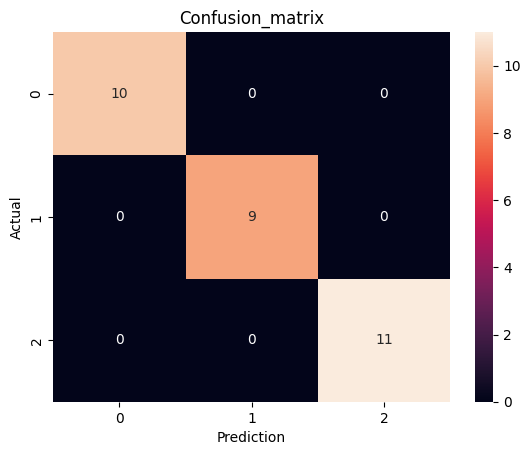

In [25]:
cm=confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion_matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

#Classification Report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(pipeline,x,y,cv=5)
print("Cross Validation Scores",scores)
print("Average Cross Validation Score",scores.mean())


Cross Validation Scores [0.96666667 1.         0.93333333 0.9        1.        ]
Average Cross Validation Score 0.9600000000000002


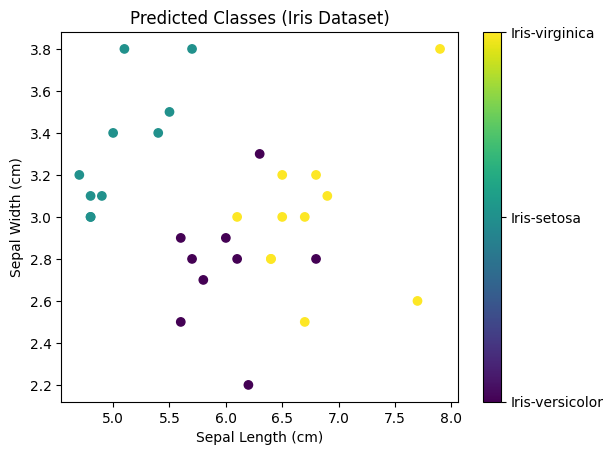

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Get predictions
predictions = pipeline.predict(X_test)

# Convert string labels to numeric codes for coloring
# We can use pd.factorize to turn labels into integers
codes, uniques = pd.factorize(predictions)

plt.figure()
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=codes, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Predicted Classes (Iris Dataset)')
# Optional: add a colorbar to show the mapping
cbar = plt.colorbar(ticks=range(len(uniques)))
cbar.set_ticklabels(uniques)
plt.show()

##Super Simple Prediction Code

In [31]:
new_flower = [[5.1, 3.5, 1.4, 0.2]]   # example values

prediction = pipeline.predict(new_flower)

print("Predicted Species:", prediction[0])

Predicted Species: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
sl = float(input("Sepal Length: "))
sw = float(input("Sepal Width: "))
pl = float(input("Petal Length: "))
pw = float(input("Petal Width: "))

new_flower = [[sl, sw, pl, pw]]

result = pipeline.predict(new_flower)

print("Predicted Iris Species:", result[0])

Sepal Length: 5.1
Sepal Width: 3.5
Petal Length: 1.4
Petal Width: 0.2
Predicted Iris Species: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
